In [1]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns

In [2]:
train_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\train'
test_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\test'
klase=['angry','disgust','fear','happy','neutral','sad','surprise']

br_klasa=len(klase)


In [3]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
                                            rescale=1./255,
                                            horizontal_flip = True,
                                            vertical_flip= True,
                                            width_shift_range = [0.1,0.2],
                                            height_shift_range = [0.1,.2],
                                            validation_split=0.2
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
                                            rescale=1./255
)

In [4]:
train_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    subset="training",
    seed=11
)

validation_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    seed=11
)

test_batch= test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,3,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(keras.layers.Conv2D(64,3,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Flatten())
keras.layers.Dense(128,activation='relu')
model.add(keras.layers.Dense(br_klasa,activation='softmax'))

print(model.summary())

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_batch,epochs=70,validation_data=validation_batch,verbose=1)


C:\Users\Djole\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │         258,055 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,127 (1.06 MB)

 Trainable params: 276,999 (1.06 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/70


C:\Users\Djole\miniconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 123ms/step - accuracy: 0.2256 - loss: 1.8774 - val_accuracy: 0.2466 - val_loss: 1.8482
Epoch 2/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.2594 - loss: 1.7880 - val_accuracy: 0.2693 - val_loss: 1.7741
Epoch 3/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.2677 - loss: 1.7729 - val_accuracy: 0.2564 - val_loss: 1.7784
Epoch 4/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.2719 - loss: 1.7633 - val_accuracy: 0.2804 - val_loss: 1.7660
Epoch 5/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.2812 - loss: 1.7551 - val_accuracy: 0.2832 - val_loss: 1.7658
Epoch 6/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.2900 - loss: 1.7427 - val_accuracy: 0.2691 - val_loss: 1.7798
Epoch 7/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.2937 - loss: 1.7415 - val_accuracy: 0.2839 - val_loss: 1.7537
Epoch 8/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 124ms/step - accuracy: 0.2999 - loss: 1.7291 - val

In [8]:
#cuvanje modela u keras formatu(novi format koji koristim umesto h5)
model.save('C:/Users/Djole/Desktop/Model_prvi_od_svih.keras')


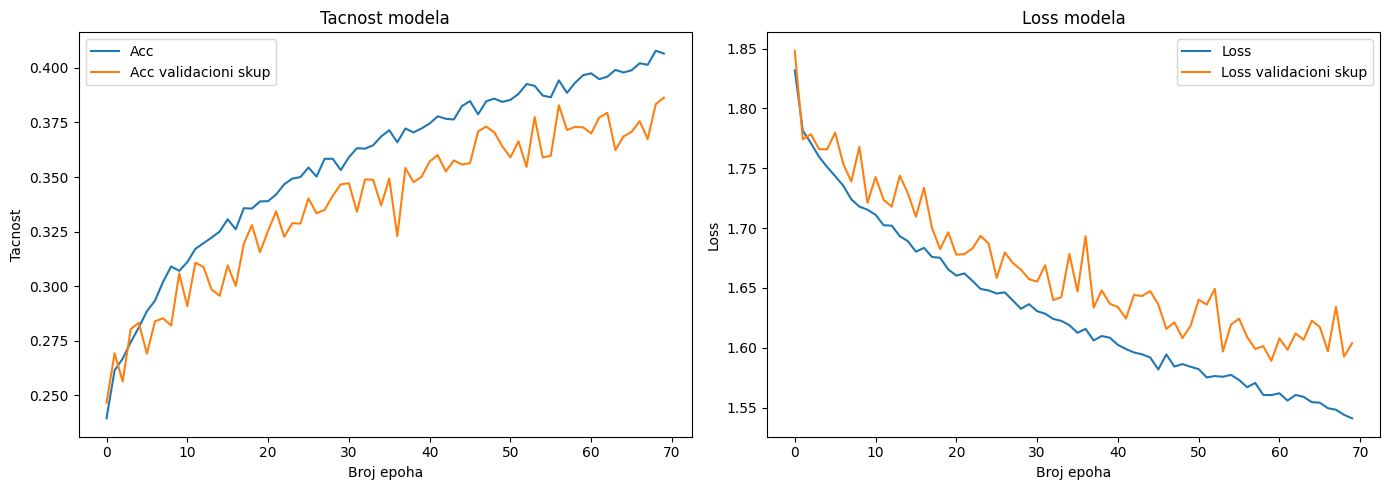

In [9]:
plt.figure(figsize=(14, 5))

#Acc
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acc')
plt.plot(history.history['val_accuracy'], label='Acc validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Tacnost')
plt.title('Tacnost modela')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Loss validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Loss')
plt.title('Loss modela')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
def test():
    test_loss, test_acc = model.evaluate(test_batch, verbose=0)

    #predikcija
    y_pred_prob = model.predict(test_batch)
    y_pred = np.argmax(y_pred_prob, axis=1)

    y_true = test_batch.classes

    # rezultati testa MICRO
    accuracy_micro = metrics.accuracy_score(y_true, y_pred)
    precision_micro = metrics.precision_score(y_true, y_pred, average='micro')
    recall_micro = metrics.recall_score(y_true, y_pred, average='micro')
    f1_micro = metrics.f1_score(y_true, y_pred, average='micro')

    print('\n================MICRO====================\n')
    print(f'Accuracy MICRO: {accuracy_micro:.4f}')
    print(f'Precision MICRO: {precision_micro:.4f}')
    print(f'Recall MICRO: {recall_micro:.4f}')
    print(f'F1 Score MICRO: {f1_micro:.4f}')

    # rezultati testa weighted
    accuracy_weighted = metrics.accuracy_score(y_true, y_pred)
    precision_weighted = metrics.precision_score(y_true, y_pred, average='weighted')
    recall_weighted = metrics.recall_score(y_true, y_pred, average='weighted')
    f1_weighted = metrics.f1_score(y_true, y_pred, average='weighted')

    print('\n================weighted====================\n')
    print(f'Accuracy weighted: {accuracy_micro:.4f}')
    print(f'Precision weighted: {precision_micro:.4f}')
    print(f'Recall weighted: {recall_micro:.4f}')
    print(f'F1 Score weighted: {f1_micro:.4f}')

    accuracy_None = metrics.accuracy_score(y_true, y_pred)
    precision_None = metrics.precision_score(y_true, y_pred, average=None)
    recall_per_None = metrics.recall_score(y_true, y_pred, average=None)
    f1_per_None = metrics.f1_score(y_true, y_pred, average=None)

    print('\n================None====================\n')
    print(f'Accuracy None: {accuracy_micro:.4f}')
    print(f'Precision None: {precision_micro:.4f}')
    print(f'Recall None: {recall_micro:.4f}')
    print(f'F1 Score None: {f1_micro:.4f}')
    # matrica konfuzije
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=klase, yticklabels=klase)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step

================MICRO====================

Accuracy MICRO: 0.2001
Precision MICRO: 0.2001
Recall MICRO: 0.2001
F1 Score MICRO: 0.2001

================weighted====================

Accuracy weighted: 0.2001
Precision weighted: 0.2001
Recall weighted: 0.2001
F1 Score weighted: 0.2001

================None====================

Accuracy None: 0.2001
Precision None: 0.2001
Recall None: 0.2001
F1 Score None: 0.2001


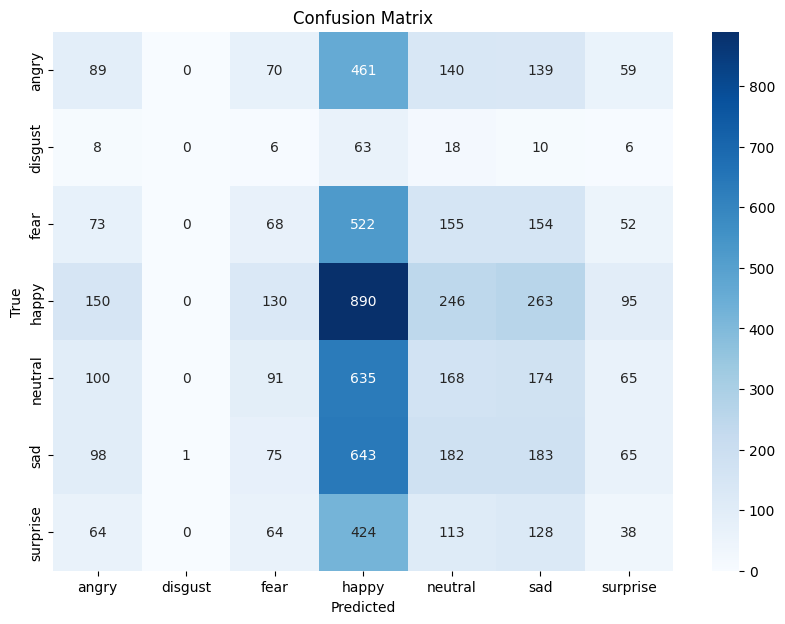

In [11]:
test()